In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense ,Dropout
from tensorflow.keras import layers

import datetime
import math

In [116]:
df = pd.read_excel('MaruteruOriginalDatainCM.xlsx')

In [117]:
df.head()

,Year,SMW,MaxT,MinT,RH1,RH2,RF,WS,SSH,EVPcm
0,1994,1,27.2,18.6,90.0,69.0,1.5,2.6,6.8,1.91
1,1994,2,27.3,19.1,91.0,69.0,0.2,2.6,6.4,1.99
2,1994,3,27.9,19.3,92.0,68.0,0.1,1.9,7.2,1.84
3,1994,4,28.0,19.3,92.0,70.0,0.0,2.0,6.7,1.71
4,1994,5,28.7,19.3,93.0,68.0,0.9,1.8,7.2,2.00


In [118]:
df.head()

,Year,SMW,MaxT,MinT,RH1,RH2,RF,WS,SSH,EVPcm
0,1994,1,27.2,18.6,90.0,69.0,1.5,2.6,6.8,1.91
1,1994,2,27.3,19.1,91.0,69.0,0.2,2.6,6.4,1.99
2,1994,3,27.9,19.3,92.0,68.0,0.1,1.9,7.2,1.84
3,1994,4,28.0,19.3,92.0,70.0,0.0,2.0,6.7,1.71
4,1994,5,28.7,19.3,93.0,68.0,0.9,1.8,7.2,2.00


In [119]:
df = df.rename(columns={"Year": "year", 'MaxT':'MAX','MinT':'MIN', 'RH1': 'RHI', 'RH2':'RHII', 'EVPcm':'EVAP'})

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    884 non-null    int64  
 1   SMW     884 non-null    int64  
 2   MAX     884 non-null    float64
 3   MIN     884 non-null    float64
 4   RHI     884 non-null    float64
 5   RHII    884 non-null    float64
 6   RF      884 non-null    float64
 7   WS      884 non-null    float64
 8   SSH     884 non-null    float64
 9   EVAP    884 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 69.2 KB


In [121]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,884.0,2002.000000,4.901753,1994.00,1998.000,2002.00,2006.000,2010.0
SMW,884.0,26.500000,15.016827,1.00,13.750,26.50,39.250,52.0
MAX,884.0,30.880430,2.896401,23.70,28.900,30.60,32.325,42.7
MIN,884.0,22.518100,2.903825,15.00,20.275,23.00,24.700,30.2
RHI,884.0,88.998529,4.756143,9.30,87.100,89.60,91.700,97.7
RHII,884.0,67.209615,10.973660,27.70,60.850,67.30,74.450,95.1
RF,884.0,17.618439,36.940888,0.00,0.000,0.00,17.775,332.0
WS,884.0,3.904525,2.417673,1.20,2.100,3.00,5.100,13.2
SSH,884.0,6.031674,2.347045,0.00,4.300,6.40,7.900,13.9
EVAP,884.0,3.359276,1.175747,1.67,2.500,3.07,4.000,8.6


In [122]:
df.isnull().sum()

year    0
SMW     0
MAX     0
MIN     0
RHI     0
RHII    0
RF      0
WS      0
SSH     0
EVAP    0
dtype: int64

In [123]:
sns.set_theme(style="ticks", color_codes=True)

In [124]:
#Drop Emp_Title as it is not required
df = df.drop(["SSH","SMW"], axis=1)

In [125]:
gby_df = df.groupby(['year'],as_index=False).mean()

In [126]:
gby_df

,year,MAX,MIN,RHI,RHII,RF,WS,EVAP
0,1994,30.828846,22.600000,88.942308,67.211538,26.663462,3.005769,2.611346
1,1995,31.325000,21.636538,88.492308,67.211538,28.750000,3.005769,2.614231
2,1996,30.951923,21.726923,89.563462,67.211538,33.653846,3.005769,2.614231
3,1997,31.051923,21.540385,89.978846,67.211538,22.463462,3.005769,2.614231
4,1998,31.515385,22.438462,89.700000,77.194231,0.000000,4.901923,2.655577
5,1999,31.019231,21.794231,89.467308,69.096154,0.000000,4.901923,3.509615
6,2000,30.915385,21.775000,88.505769,69.817308,0.000000,4.913462,3.728846
7,2001,31.244231,21.969231,87.721154,66.911538,0.000000,5.001923,3.573077
8,2002,31.507692,22.019231,87.730769,64.171154,9.107692,5.136538,3.842308
9,2003,30.501923,22.800000,90.361538,72.865385,18.280769,5.221154,3.540385


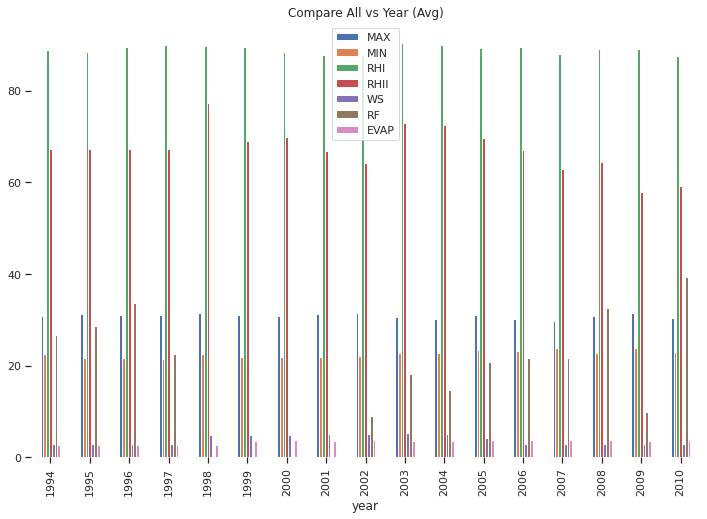

In [127]:
gby_df.plot(x="year", y=['MAX', 'MIN', 'RHI', 'RHII', 'WS', 'RF',
       'EVAP'], kind="bar", title="Compare All vs Year (Avg)", figsize=(12,8))
plt.box(False)

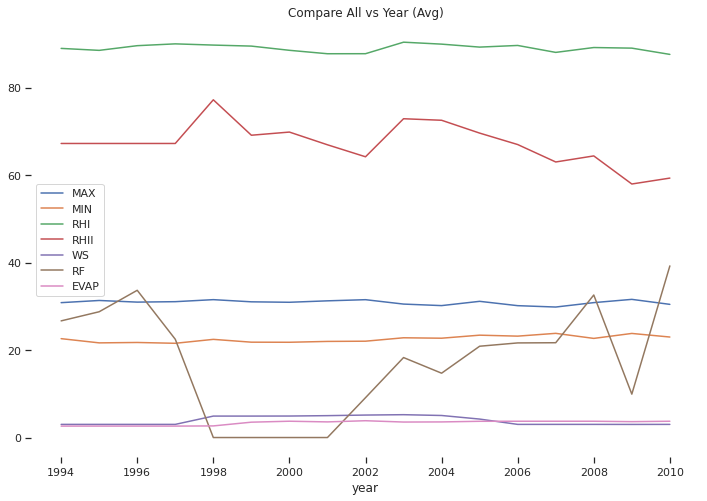

In [128]:
gby_df.plot(x="year", y=['MAX', 'MIN', 'RHI', 'RHII', 'WS', 'RF',
       'EVAP'], kind="line", title="Compare All vs Year (Avg)", figsize=(12,8))
plt.box(False)

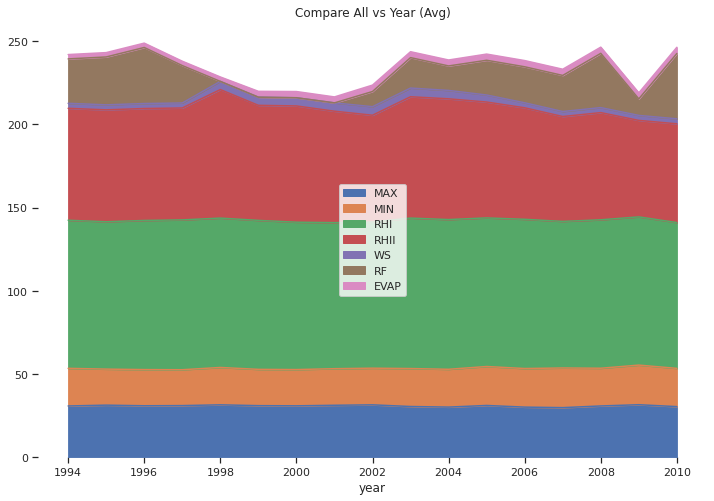

In [129]:
gby_df.plot(x="year", y=['MAX', 'MIN', 'RHI', 'RHII', 'WS', 'RF',
       'EVAP'], kind="area", title="Compare All vs Year (Avg)", figsize=(12,8))
plt.box(False)

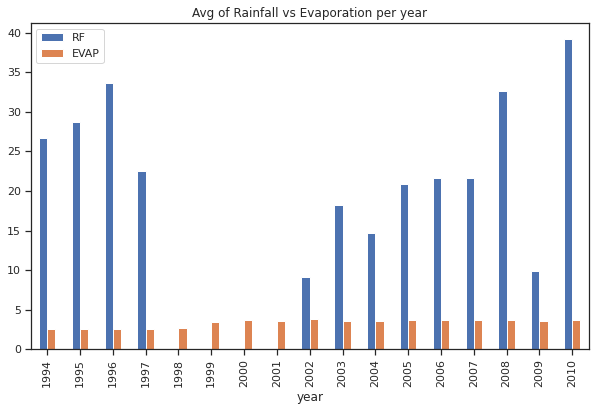

In [130]:
gby_df.plot(x="year", y=["RF", "EVAP"], kind="bar", title="Avg of Rainfall vs Evaporation per year", figsize=(10,6))
plt.box(True)

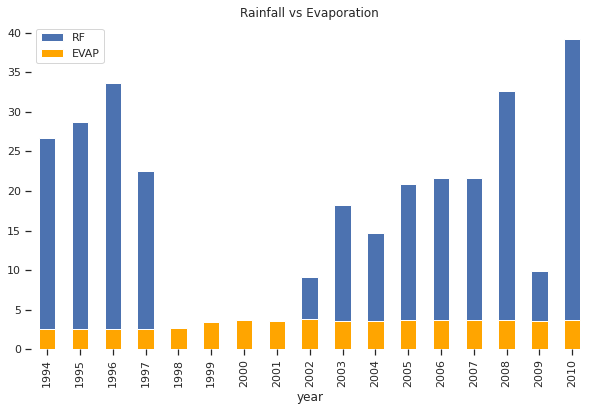

In [131]:
ax = gby_df.plot(x="year", y=["RF"], kind="bar")
gby_df.plot(ax=ax, x="year", y=["EVAP"], kind="bar", color="orange", title="Rainfall vs Evaporation", figsize=(10,6))
plt.box(False)

Text(0.5, 0.98, 'Rainfall vs Year')

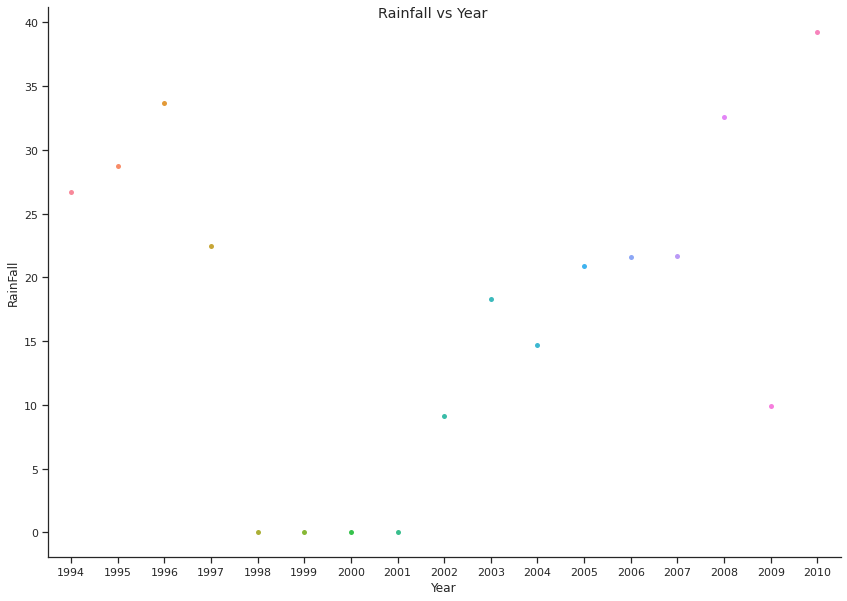

In [132]:
s = sns.catplot(x="year", y="RF", kind="swarm", data=gby_df, height=8.27, aspect=11.7/8.27)
s.set_xlabels("Year")
s.set_ylabels("RainFall")
s.fig.suptitle('Rainfall vs Year')

Text(0.5, 0.98, 'Rainfall vs Year')

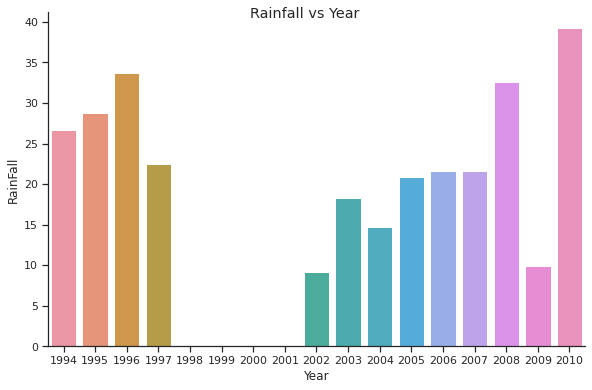

In [133]:
s = sns.catplot(x="year", y="RF", kind="bar", data=gby_df, height=5.27, aspect=9.7/6.27)
s.set_xlabels("Year")
s.set_ylabels("RainFall")
s.fig.suptitle('Rainfall vs Year')

In [134]:
#Drop year as it is not required
df = df.drop(["year"], axis=1)

In [135]:
df.head()

,MAX,MIN,RHI,RHII,RF,WS,EVAP
0,27.2,18.6,90.0,69.0,1.5,2.6,1.91
1,27.3,19.1,91.0,69.0,0.2,2.6,1.99
2,27.9,19.3,92.0,68.0,0.1,1.9,1.84
3,28.0,19.3,92.0,70.0,0.0,2.0,1.71
4,28.7,19.3,93.0,68.0,0.9,1.8,2.00


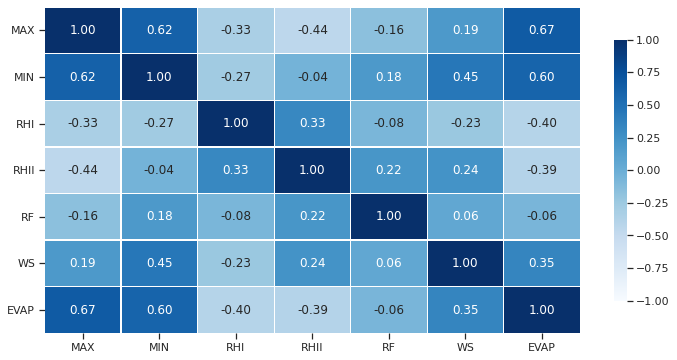

In [136]:
# correlation heat map
plt.figure(figsize=(12, 6))
df_corr = df.corr()

# min -1 and max +1 as we are plotting correlation
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".2f", vmin= -1.0, vmax=1.0,
           linewidth=0.3, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [137]:
df = df.drop("RHII", axis=1)
df.columns

Index(['MAX', 'MIN', 'RHI', 'RF', 'WS', 'EVAP'], dtype='object')

In [138]:
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,MAX,MIN,RHI,RF,WS,EVAP
0,27.2,18.6,90.0,1.5,2.6,1.91
1,27.3,19.1,91.0,0.2,2.6,1.99
2,27.9,19.3,92.0,0.1,1.9,1.84
3,28.0,19.3,92.0,0.0,2.0,1.71
4,28.7,19.3,93.0,0.9,1.8,2.00
...,...,...,...,...,...,...
879,30.3,20.3,88.6,0.0,4.2,2.80
880,26.1,20.1,89.0,107.0,3.0,2.80
881,27.3,20.1,88.1,0.0,2.9,2.60
882,27.3,16.2,83.1,0.0,2.1,2.50


In [139]:
X = df.drop('EVAP', axis=1).values
y = df['EVAP'].values

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [141]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
X_train.shape

(618, 5)

In [143]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

In [144]:
model = Sequential()

model.add(Dense(8, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(4,  activation="relu"))
model.add(Dense(1,  activation="relu"))

model.compile(loss = "mse", optimizer = 'adam')

In [145]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=400, batch_size=10, callbacks=[early_stop])

Epoch 1/400
62/62 [==============================] - 1s 6ms/step - loss: 7.3883 - val_loss: 4.1584
Epoch 2/400
62/62 [==============================] - 0s 2ms/step - loss: 2.9485 - val_loss: 1.2763
Epoch 3/400
62/62 [==============================] - 0s 3ms/step - loss: 1.0613 - val_loss: 0.9281
Epoch 4/400
62/62 [==============================] - 0s 3ms/step - loss: 0.9400 - val_loss: 0.9111
Epoch 5/400
62/62 [==============================] - 0s 2ms/step - loss: 0.8289 - val_loss: 0.8932
Epoch 6/400
62/62 [==============================] - 0s 3ms/step - loss: 0.9664 - val_loss: 0.8758
Epoch 7/400
62/62 [==============================] - 0s 2ms/step - loss: 0.8078 - val_loss: 0.8648
Epoch 8/400
62/62 [==============================] - 0s 3ms/step - loss: 0.8838 - val_loss: 0.8443
Epoch 9/400
62/62 [==============================] - 0s 2ms/step - loss: 0.8356 - val_loss: 0.8312
Epoch 10/400
62/62 [==============================] - 0s 2ms/step - loss: 0.8271 - val_loss: 0.8162
Epoch 11/

62/62 [==============================] - 0s 2ms/step - loss: 0.7155 - val_loss: 0.6720
Epoch 84/400
62/62 [==============================] - 0s 2ms/step - loss: 0.7020 - val_loss: 0.6724
Epoch 85/400
62/62 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6727
Epoch 00085: early stopping


In [147]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

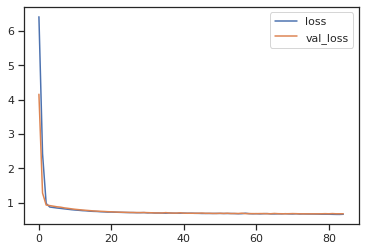

In [148]:
losses.plot()

In [149]:
test_predictions = model.predict(X_test)

In [150]:
test_predictions

array([[4.693626 ],
       [3.4805882],
       [4.814841 ],
       [3.1747835],
       [2.5023417],
       [2.0954409],
       [3.6476328],
       [3.5450354],
       [5.2009797],
       [3.5233645],
       [3.22577  ],
       [4.4268823],
       [3.9377122],
       [4.119452 ],
       [4.9875646],
       [3.2755942],
       [2.2563324],
       [2.04427  ],
       [1.8620033],
       [3.0513349],
       [2.494996 ],
       [3.656745 ],
       [3.2149396],
       [4.7701993],
       [3.1404362],
       [3.6736164],
       [3.7553701],
       [2.3154376],
       [2.8845248],
       [6.084706 ],
       [2.6330006],
       [4.067052 ],
       [4.3345227],
       [3.0542488],
       [4.2821417],
       [2.830999 ],
       [2.641725 ],
       [3.619897 ],
       [3.1222875],
       [2.2076716],
       [3.888228 ],
       [2.4170809],
       [2.2905426],
       [3.0746188],
       [2.8410692],
       [3.3759499],
       [3.7214391],
       [3.8257627],
       [3.4572566],
       [3.8277063],


In [151]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [152]:
pred_df

,Test Y
0,5.20
1,4.00
2,4.64
3,3.30
4,1.99
...,...
261,7.80
262,2.00
263,2.47
264,4.60


In [153]:
test_predictions = pd.Series(test_predictions.reshape(266,))

In [154]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [155]:
pred_df.columns = ['Test Y','Model Predictions']

In [156]:
pred_df

,Test Y,Model Predictions
0,5.20,4.693626
1,4.00,3.480588
2,4.64,4.814841
3,3.30,3.174783
4,1.99,2.502342
...,...,...
261,7.80,5.330083
262,2.00,3.750631
263,2.47,3.628259
264,4.60,3.861521


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

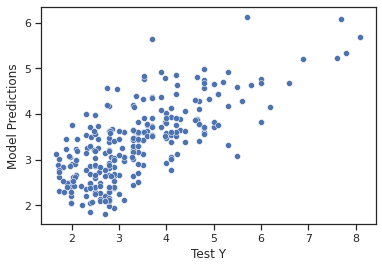

In [157]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [158]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

/home/rishab/anaconda3/envs/iotedge/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

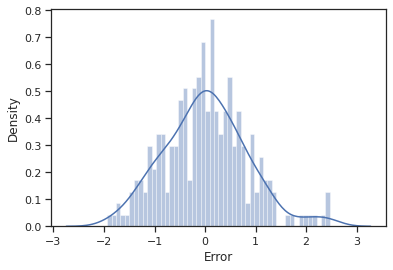

In [159]:
sns.distplot(pred_df['Error'],bins=50)

# Mean Absolute Error

In [160]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

0.6384807471045875

# Mean Squared Error

In [161]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

0.6726866905594899

# Predicting on brand new data

In [162]:
new_data = [[29.2,12.2,67.6,5.7,6.0]]

In [163]:
# Don't forget to scale!
scaler.transform(new_data)

array([[ 0.28947368, -0.19047619,  0.65950226,  0.01716867,  0.4       ]])

In [164]:
new_data = scaler.transform(new_data)

In [165]:
model.predict(new_data)

array([[2.038523]], dtype=float32)

In [166]:
model.save("v1.h5")